<a href="https://colab.research.google.com/github/Aadi1612/House_price_prediction_model/blob/main/House_Price_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import library which needed

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
house = pd.read_csv('//content/train.csv')
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Firstly , Choose the columns you want to work with

In [ ]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC


Now, see which columns we will work with, here I use heatmap to visualyze the correlation

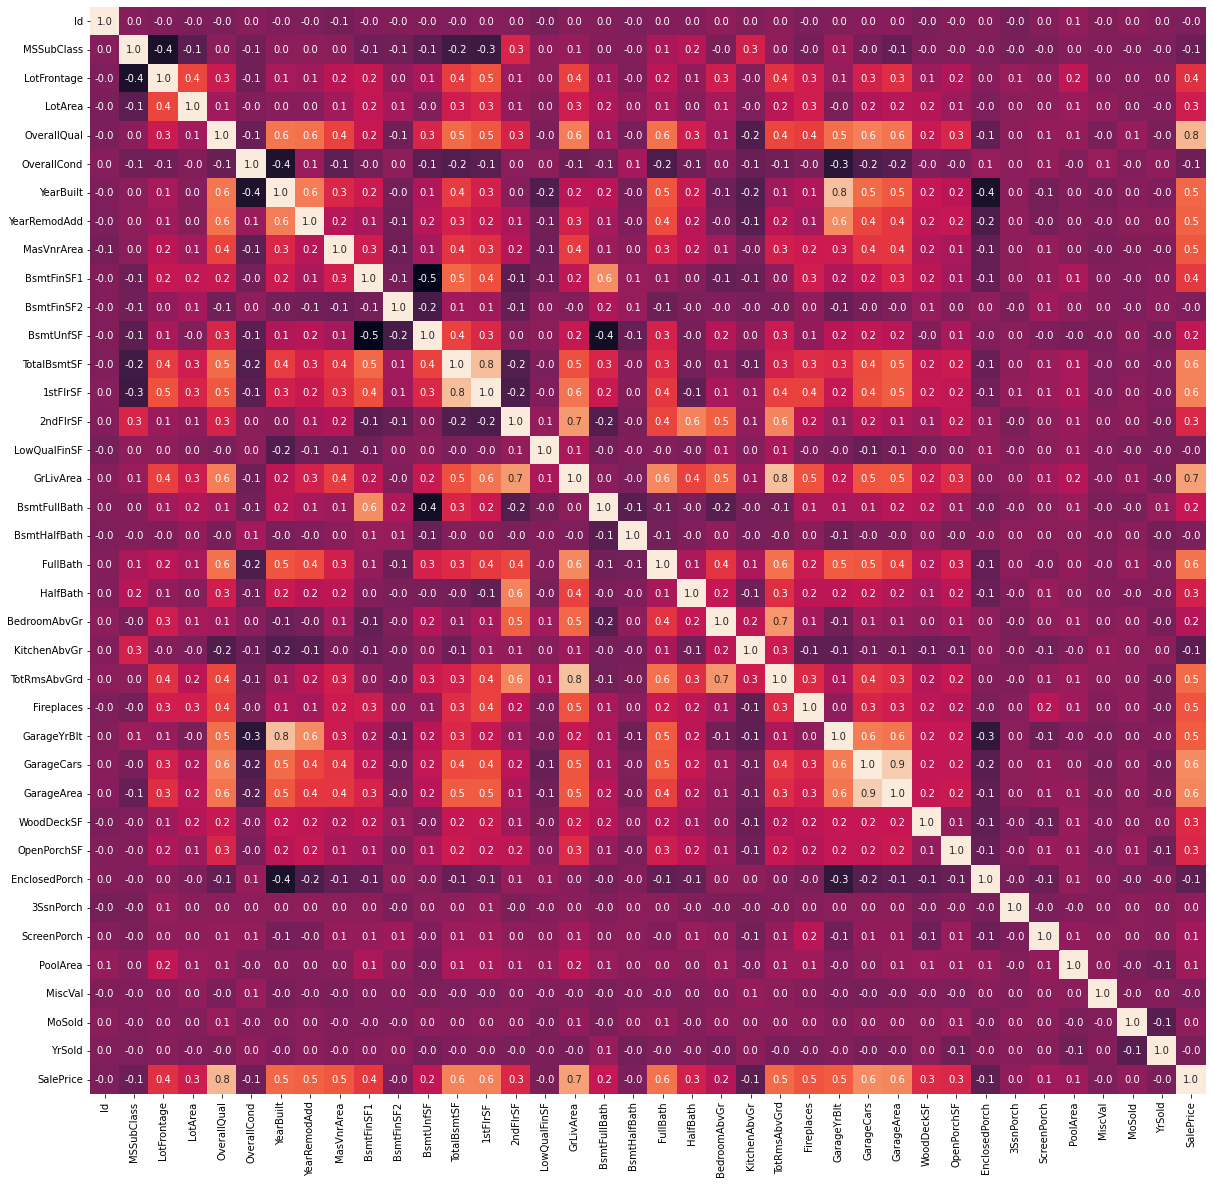

In [ ]:
plt.figure(figsize = (20,20))
sns.heatmap(house.corr(), cbar = False,fmt = '.1f', annot = True)

Take some columns that have correlation equal or greater than 50%.

For eg: 'MSZoning', 'Street' and 'HeatingQC' have similar properties.

In [ ]:
house0 = house[['SalePrice','MSZoning', 'Street','HeatingQC', 'TotRmsAbvGrd','GrLivArea','1stFlrSF',
                'GarageArea','FullBath','OverallQual',
               'YearRemodAdd','MasVnrArea','YearBuilt']]
house0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SalePrice     1460 non-null   int64  
 1   MSZoning      1460 non-null   object 
 2   Street        1460 non-null   object 
 3   HeatingQC     1460 non-null   object 
 4   TotRmsAbvGrd  1460 non-null   int64  
 5   GrLivArea     1460 non-null   int64  
 6   1stFlrSF      1460 non-null   int64  
 7   GarageArea    1460 non-null   int64  
 8   FullBath      1460 non-null   int64  
 9   OverallQual   1460 non-null   int64  
 10  YearRemodAdd  1460 non-null   int64  
 11  MasVnrArea    1452 non-null   float64
 12  YearBuilt     1460 non-null   int64  
dtypes: float64(1), int64(9), object(3)
memory usage: 148.4+ KB


Describe table to find out which columns have none=values and which ones need preprocessing

In [ ]:
house0.describe()

,SalePrice,TotRmsAbvGrd,GrLivArea,1stFlrSF,GarageArea,FullBath,OverallQual,YearRemodAdd,MasVnrArea,YearBuilt
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000
mean,180921.195890,6.517808,1515.463699,1162.626712,472.980137,1.565068,6.099315,1984.865753,103.685262,1971.267808
std,79442.502883,1.625393,525.480383,386.587738,213.804841,0.550916,1.382997,20.645407,181.066207,30.202904
min,34900.000000,2.000000,334.000000,334.000000,0.000000,0.000000,1.000000,1950.000000,0.000000,1872.000000
25%,129975.000000,5.000000,1129.500000,882.000000,334.500000,1.000000,5.000000,1967.000000,0.000000,1954.000000
50%,163000.000000,6.000000,1464.000000,1087.000000,480.000000,2.000000,6.000000,1994.000000,0.000000,1973.000000
75%,214000.000000,7.000000,1776.750000,1391.250000,576.000000,2.000000,7.000000,2004.000000,166.000000,2000.000000
max,755000.000000,14.000000,5642.000000,4692.000000,1418.000000,3.000000,10.000000,2010.000000,1600.000000,2010.000000


MasVnrArea 1452 non-null float64

There just 8 rows have none-values. So we just drop it

In [ ]:
house0[house0['MasVnrArea'].isna()]

,SalePrice,MSZoning,Street,HeatingQC,TotRmsAbvGrd,GrLivArea,1stFlrSF,GarageArea,FullBath,OverallQual,YearRemodAdd,MasVnrArea,YearBuilt
234,216500,RL,Pave,Ex,8,1960,860,440,2,6,2002,NaN,2002
529,200624,RL,Pave,TA,9,2515,2515,484,3,6,1975,NaN,1957
650,205950,FV,Pave,Ex,7,1665,822,562,2,7,2007,NaN,2007
936,184900,RL,Pave,Ex,5,1200,1200,555,2,7,2003,NaN,2003
973,182000,FV,Pave,Ex,6,1428,1428,480,2,7,2008,NaN,2007
977,199900,FV,Pave,Ex,4,1241,1241,569,1,7,2007,NaN,2006
1243,465000,RL,Pave,Ex,7,2076,2076,850,2,10,2006,NaN,2006
1278,237000,RL,Pave,Ex,7,2031,1128,577,2,8,2002,NaN,2002


check one more time

In [ ]:
house1 = house0.drop([234,529,650,936,973,977,1243,1278],axis = 0)
house1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SalePrice     1452 non-null   int64  
 1   MSZoning      1452 non-null   object 
 2   Street        1452 non-null   object 
 3   HeatingQC     1452 non-null   object 
 4   TotRmsAbvGrd  1452 non-null   int64  
 5   GrLivArea     1452 non-null   int64  
 6   1stFlrSF      1452 non-null   int64  
 7   GarageArea    1452 non-null   int64  
 8   FullBath      1452 non-null   int64  
 9   OverallQual   1452 non-null   int64  
 10  YearRemodAdd  1452 non-null   int64  
 11  MasVnrArea    1452 non-null   float64
 12  YearBuilt     1452 non-null   int64  
dtypes: float64(1), int64(9), object(3)
memory usage: 158.8+ KB


# **Analysis Data**

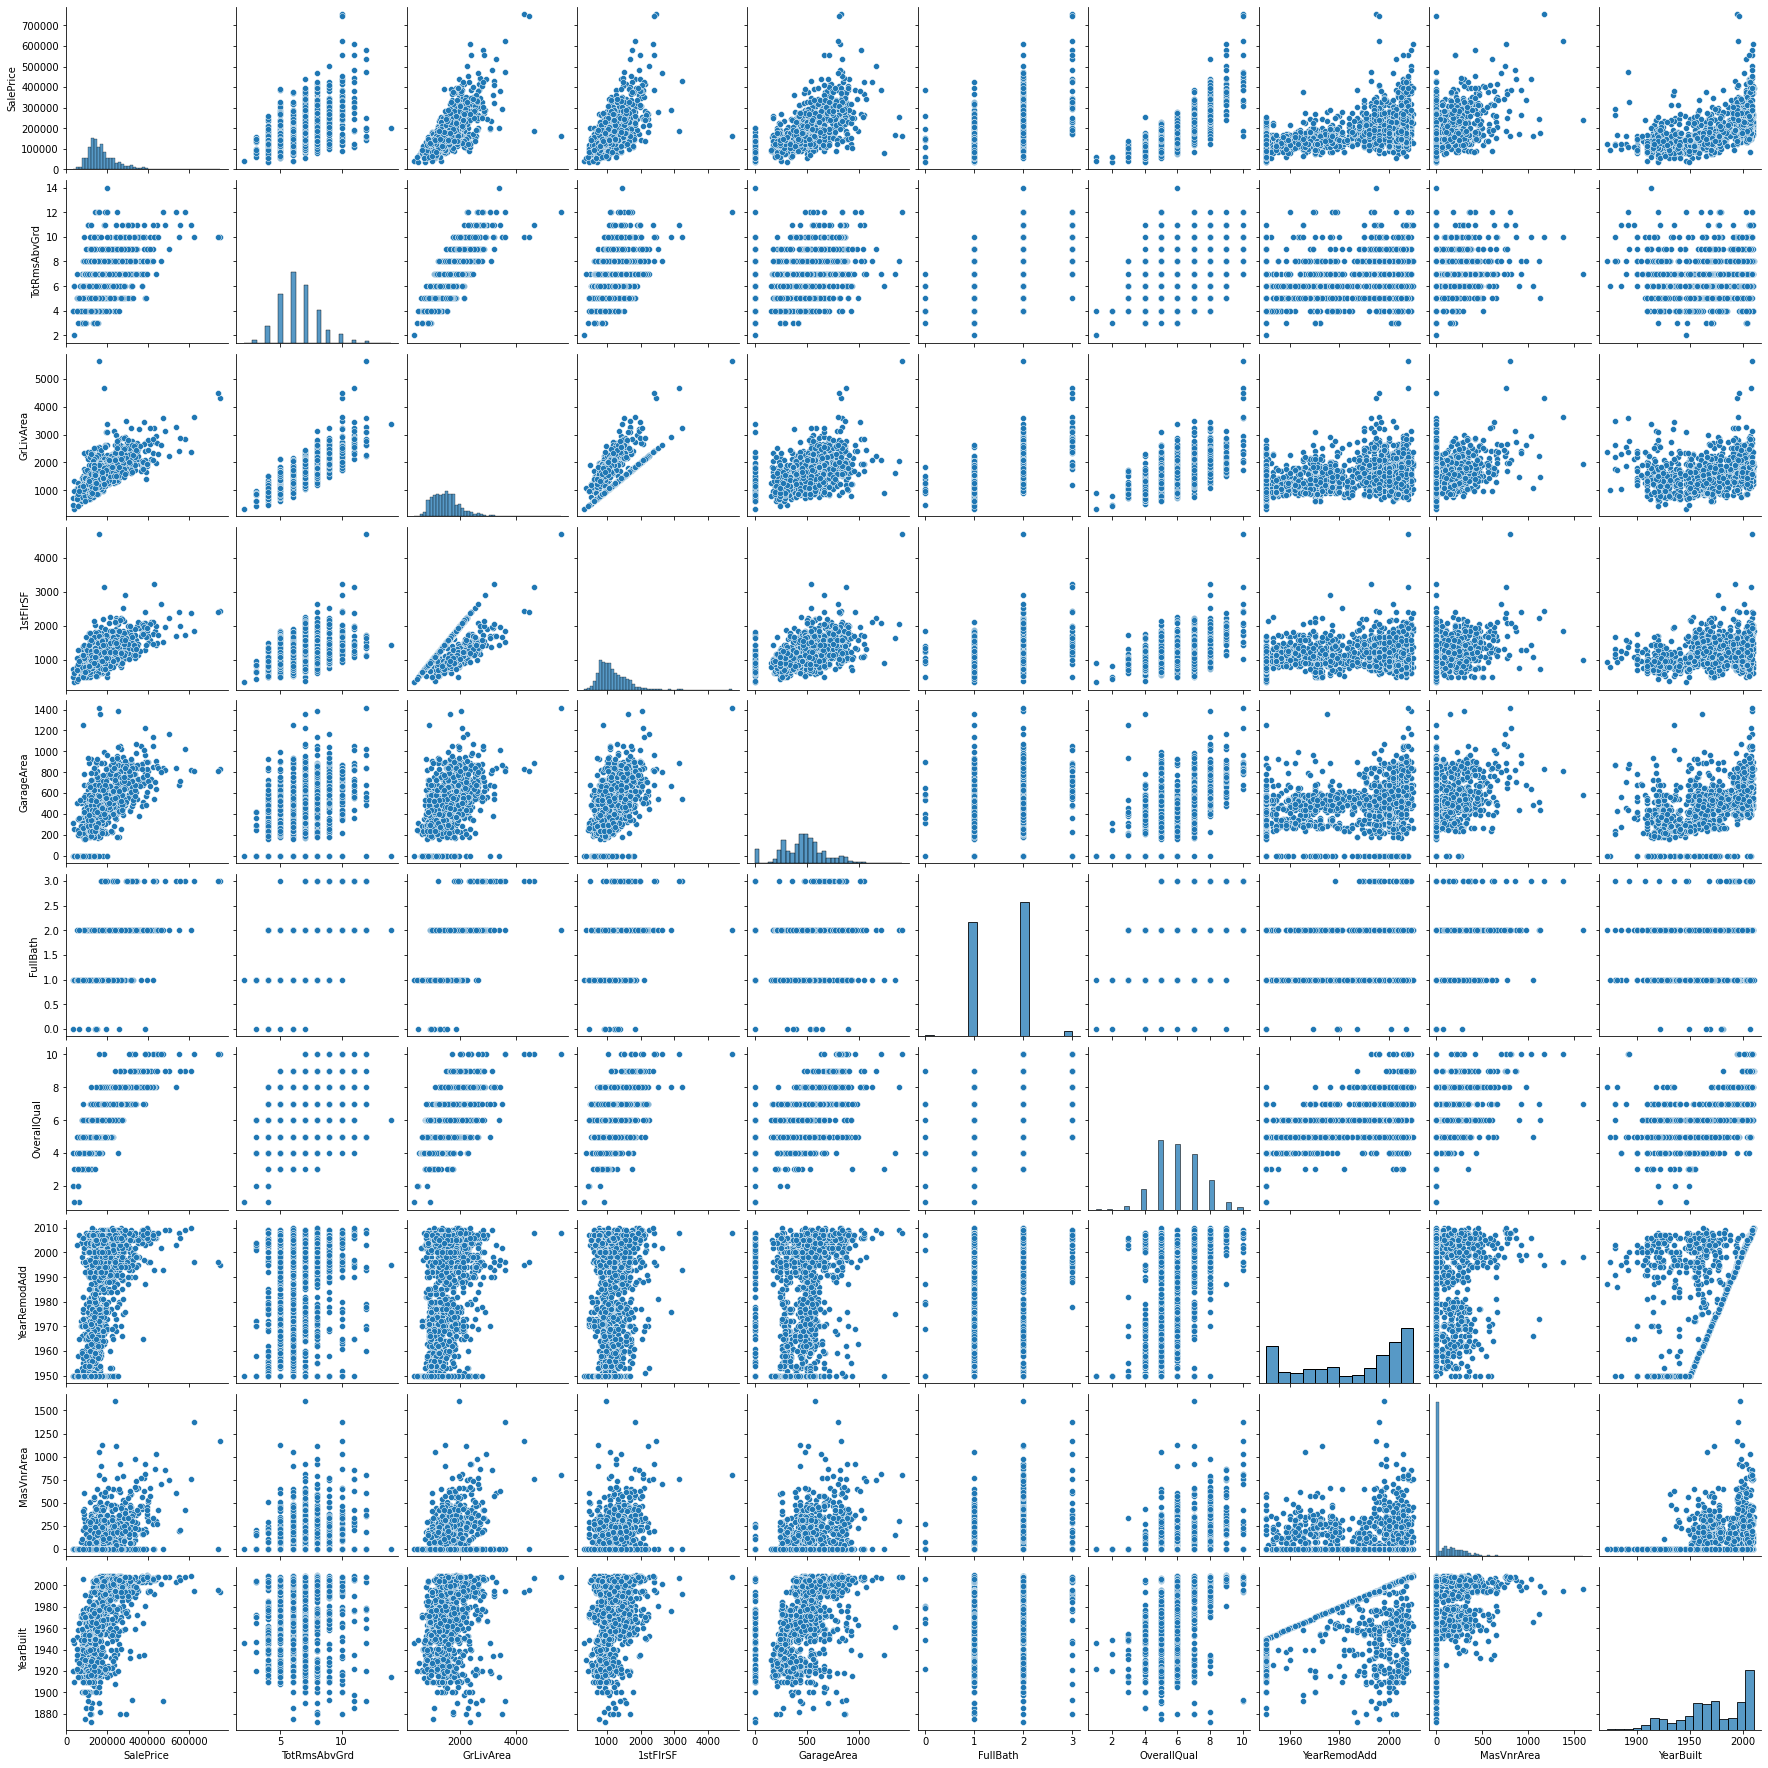

In [ ]:
sns.pairplot(house1)

This is Sale Price predict project, so we just focus on SALE PRICE columns and they have strongly Correlated OverallQual is highly correlated with target feature SalePrice at 0.8

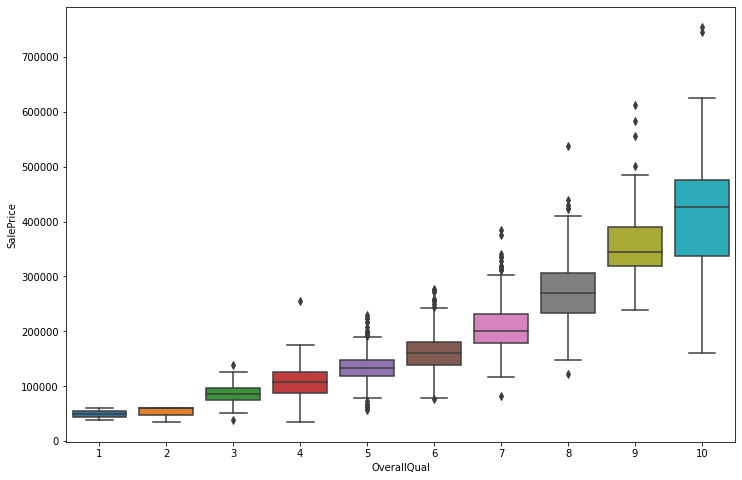

In [ ]:
plt.figure(figsize = (12,8))
sns.boxplot(data = house1, y = 'SalePrice', x = 'OverallQual')

# **PREPROCESSING THE DATA**

In [ ]:
ms = pd.get_dummies(house1['MSZoning'],drop_first = True )
street = pd.get_dummies(house1['Street'],drop_first = True )
heat = pd.get_dummies(house1['HeatingQC'],drop_first = True )
house1 = pd.concat([house1,ms,street,heat], axis =1 )
house1.drop(['MSZoning','Street','HeatingQC'], axis =1, inplace = True)
house1

,SalePrice,TotRmsAbvGrd,GrLivArea,1stFlrSF,GarageArea,FullBath,OverallQual,YearRemodAdd,MasVnrArea,YearBuilt,FV,RH,RL,RM,Pave,Fa,Gd,Po,TA
0,208500,8,1710,856,548,2,7,2003,196.0,2003,0,0,1,0,1,0,0,0,0
1,181500,6,1262,1262,460,2,6,1976,0.0,1976,0,0,1,0,1,0,0,0,0
2,223500,6,1786,920,608,2,7,2002,162.0,2001,0,0,1,0,1,0,0,0,0
3,140000,7,1717,961,642,1,7,1970,0.0,1915,0,0,1,0,1,0,1,0,0
4,250000,9,2198,1145,836,2,8,2000,350.0,2000,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,7,1647,953,460,2,6,2000,0.0,1999,0,0,1,0,1,0,0,0,0
1456,210000,7,2073,2073,500,2,6,1988,119.0,1978,0,0,1,0,1,0,0,0,1
1457,266500,9,2340,1188,252,2,7,2006,0.0,1941,0,0,1,0,1,0,0,0,0
1458,142125,5,1078,1078,240,1,5,1996,0.0,1950,0,0,1,0,1,0,1,0,0


In [ ]:
X_train = house1.drop('SalePrice',axis =1 )
y_train = house1[['SalePrice']]

# **Test dataset**

In [ ]:
test0 = pd.read_csv('/content/test.csv')
submission = pd.read_csv('/content/sample_submission.csv')
test = test0.merge(submission, on = 'Id')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,169277.052498
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,187758.393989
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,183583.683570
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,179317.477511
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,150730.079977


In [ ]:
X_test = test[['MSZoning', 'Street','HeatingQC', 'TotRmsAbvGrd','GrLivArea','1stFlrSF',
                'GarageArea','FullBath','OverallQual',
               'YearRemodAdd','MasVnrArea','YearBuilt']]

y_test = test[['SalePrice']]

In [ ]:
X_test.describe()

,TotRmsAbvGrd,GrLivArea,1stFlrSF,GarageArea,FullBath,OverallQual,YearRemodAdd,MasVnrArea,YearBuilt
count,1459.000000,1459.000000,1459.000000,1458.000000,1459.000000,1459.000000,1459.000000,1444.000000,1459.000000
mean,6.385195,1486.045922,1156.534613,472.768861,1.570939,6.078821,1983.662783,100.709141,1971.357779
std,1.508895,485.566099,398.165820,217.048611,0.555190,1.436812,21.130467,177.625900,30.390071
min,3.000000,407.000000,407.000000,0.000000,0.000000,1.000000,1950.000000,0.000000,1879.000000
25%,5.000000,1117.500000,873.500000,318.000000,1.000000,5.000000,1963.000000,0.000000,1953.000000
50%,6.000000,1432.000000,1079.000000,480.000000,2.000000,6.000000,1992.000000,0.000000,1973.000000
75%,7.000000,1721.000000,1382.500000,576.000000,2.000000,7.000000,2004.000000,164.000000,2001.000000
max,15.000000,5095.000000,5095.000000,1488.000000,4.000000,10.000000,2010.000000,1290.000000,2010.000000


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSZoning      1455 non-null   object 
 1   Street        1459 non-null   object 
 2   HeatingQC     1459 non-null   object 
 3   TotRmsAbvGrd  1459 non-null   int64  
 4   GrLivArea     1459 non-null   int64  
 5   1stFlrSF      1459 non-null   int64  
 6   GarageArea    1458 non-null   float64
 7   FullBath      1459 non-null   int64  
 8   OverallQual   1459 non-null   int64  
 9   YearRemodAdd  1459 non-null   int64  
 10  MasVnrArea    1444 non-null   float64
 11  YearBuilt     1459 non-null   int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 148.2+ KB


Fill none values of X_test set

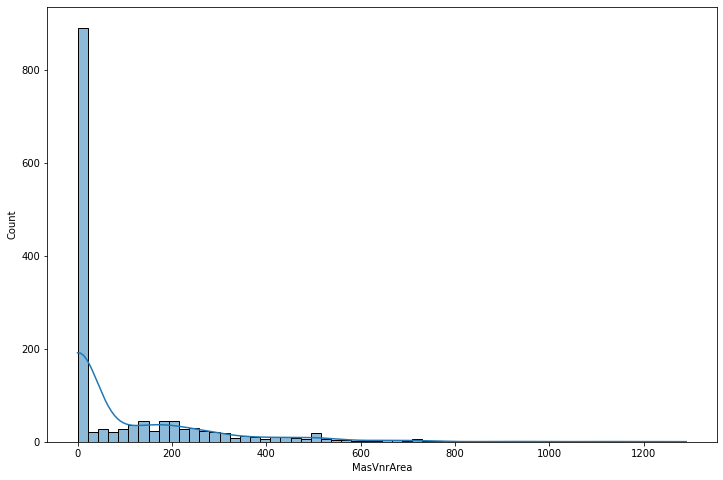

In [ ]:
plt.figure(figsize = (12,8))
sns.histplot(X_test['MasVnrArea'], bins = 60, kde = True)

In [ ]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values=np.nan, strategy = 'mean')
X_test['GarageArea'] = si.fit_transform(X_test[['GarageArea']])
X_test['MasVnrArea'] = si.fit_transform(X_test[['MasVnrArea']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


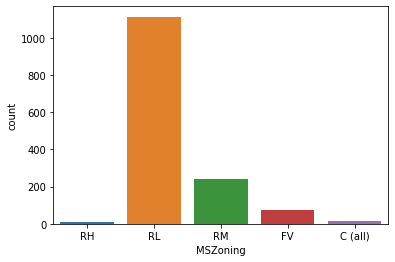

In [ ]:
sns.countplot(data = X_test, x = 'MSZoning')

In [ ]:
MS_si = SimpleImputer(missing_values=np.nan, strategy = 'constant', fill_value = 'RL')
X_test[['MSZoning']] = MS_si.fit_transform(X_test[['MSZoning']])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [ ]:
X_test

,MSZoning,Street,HeatingQC,TotRmsAbvGrd,GrLivArea,1stFlrSF,GarageArea,FullBath,OverallQual,YearRemodAdd,MasVnrArea,YearBuilt
0,RH,Pave,TA,5,896,896,730.0,1,5,1961,0.0,1961
1,RL,Pave,TA,6,1329,1329,312.0,1,6,1958,108.0,1958
2,RL,Pave,Gd,6,1629,928,482.0,2,5,1998,0.0,1997
3,RL,Pave,Ex,7,1604,926,470.0,2,6,1998,20.0,1998
4,RL,Pave,Ex,5,1280,1280,506.0,2,8,1992,0.0,1992
...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,Pave,Gd,5,1092,546,0.0,1,4,1970,0.0,1970
1455,RM,Pave,TA,6,1092,546,286.0,1,4,1970,0.0,1970
1456,RL,Pave,Ex,7,1224,1224,576.0,1,5,1996,0.0,1960
1457,RL,Pave,TA,6,970,970,0.0,1,5,1992,0.0,1992


In [ ]:
ms = pd.get_dummies(X_test['MSZoning'],drop_first = True )
street = pd.get_dummies(X_test['Street'],drop_first = True )
heat = pd.get_dummies(X_test['HeatingQC'],drop_first = True )
X_test = pd.concat([X_test,ms,street,heat], axis =1 )
X_test.drop(['MSZoning','Street','HeatingQC'], axis =1, inplace = True)
X_test

,TotRmsAbvGrd,GrLivArea,1stFlrSF,GarageArea,FullBath,OverallQual,YearRemodAdd,MasVnrArea,YearBuilt,FV,RH,RL,RM,Pave,Fa,Gd,Po,TA
0,5,896,896,730.0,1,5,1961,0.0,1961,0,1,0,0,1,0,0,0,1
1,6,1329,1329,312.0,1,6,1958,108.0,1958,0,0,1,0,1,0,0,0,1
2,6,1629,928,482.0,2,5,1998,0.0,1997,0,0,1,0,1,0,1,0,0
3,7,1604,926,470.0,2,6,1998,20.0,1998,0,0,1,0,1,0,0,0,0
4,5,1280,1280,506.0,2,8,1992,0.0,1992,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,5,1092,546,0.0,1,4,1970,0.0,1970,0,0,0,1,1,0,1,0,0
1455,6,1092,546,286.0,1,4,1970,0.0,1970,0,0,0,1,1,0,0,0,1
1456,7,1224,1224,576.0,1,5,1996,0.0,1960,0,0,1,0,1,0,0,0,0
1457,6,970,970,0.0,1,5,1992,0.0,1992,0,0,1,0,1,0,0,0,1


# **Training Model**

Linear Regresion

With LINEAR REGRESSION model there is result:


MAE: 54384.237617422325
MSE: 4547579713.2042465
RMSE: 67435.74507043164


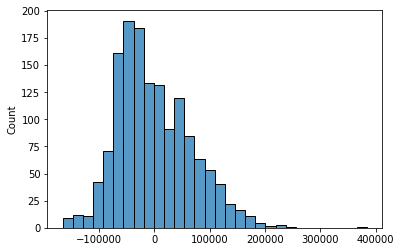

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
model1 = LinearRegression()
model1.fit(X_train,y_train['SalePrice'])
predict1 = model1.predict(X_test)

print(f"With LINEAR REGRESSION model there is result:")
print('\n')
print('MAE:', metrics.mean_absolute_error(y_test, predict1))
print('MSE:', metrics.mean_squared_error(y_test, predict1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,predict1)))

y = y_test.values.reshape((1459,))
sns.histplot((predict1-y),bins = 30)

Random Forest Regression

With RandomForestRegressor model there is result:


MAE: 53412.51131827538
MSE: 4852419649.390972
RMSE: 69659.31128995586


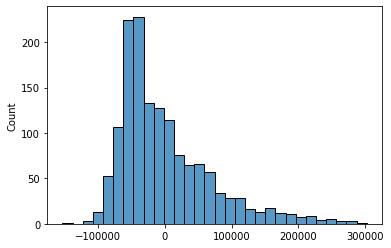

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=200).fit(X_train,y_train['SalePrice'])
predict2 = rfr.predict(X_test)

print(f"With RandomForestRegressor model there is result:")
print('\n')
print('MAE:', metrics.mean_absolute_error(y_test, predict2))
print('MSE:', metrics.mean_squared_error(y_test, predict2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,predict2)))
sns.histplot((predict2-y),bins = 30)

Gradient Boosting Regression

With GradientBoostingRegressor model there is result:


MAE: 11454.030012642366
MSE: 254604964.28178596
RMSE: 15956.34558041991


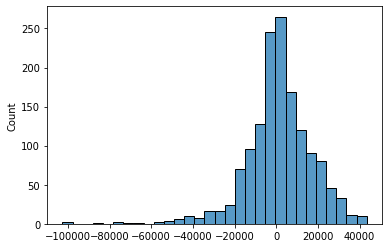

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=1,learning_rate = 0.05,subsample=1,max_depth=7).fit(X_train,y_train['SalePrice'])
predict3 = gbr.predict(X_test)

print(f"With GradientBoostingRegressor model there is result:")
print('\n')
print('MAE:', metrics.mean_absolute_error(y_test['SalePrice'], predict3))
print('MSE:', metrics.mean_squared_error(y_test['SalePrice'], predict3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test['SalePrice'],predict3)))
sns.histplot((predict3-y),bins = 30)